O presente trabalho visa o cálculo do diagrama $P-\delta$ de uma viga biapoiada de concreto armado. A viga 30x50 cm. A armadura inferior é de 6$\phi$ de 20 mm e a armadura superior de 2$\phi$ de 10 mm.  O cobrimento é de 3 cm o estribo ($\phi_{e}$) de 5 mm e $f_{ck}$ de 25 MPa. A viga utilizada está apresentada na Figura 1. Para a determinação considere que a viga pertence a um sistema estrutural de utilização residencial.

Para detemrinar os esforços e deslocamento dessa peça estrutural utilizamos as seguintes formulações:

![](/content/figura1.PNG)

Momento Fletor  
$$M_{k} = \frac{P_{k}.L}{4}$$

Deflexão no meio do vão  
$$\delta_{k} = \frac{P_{k}.L^3}{48.E.I}$$

Para a determinação da deflexão no meio do vão é necessário estabelecer combinações de carregamento em função do **Estado Limite de Deformação Excessiva (ELS-DEF)**. Para isso será utilizada a combinação **Quase Permanente (CQP)**. Para essa ocasião considera-se o coeficiente $\psi_{2}$ confomre **seção 11.1 da NBR 6118**. No caso dessa normativa o valor de $\psi_{2} = 0,30$ conforme **tabela 11.2 da NBR 6118**. Portanto considerando que a carga variável corresponde a cerca de 40% da carga permanente (ou $q = 0,40g$) toma-se então a seguinte formulação:

$$F_{d,ser}=\sum F_{gi,k} + \sum \psi_{2,j}.F_{qj,k}$$

Para peça de concreto em questão foi calculado o momento resistente para cada uma das seções utilizando equilibrio de forças normais conforme teoria de Flexão Normal Simples. Os valores são apresentados abaixo:

**Viga com armadura de 10 mm na área comprimida**

$$\beta_{x} = 0,44477670666929003$$
$$x = 20,237340153452696 cm$$
$$M_{r,d} = 30950,48104970534 kN.cm$$

**Viga com armadura de 16 mm na área comprimida**

$$\beta_{x} = 0,3676568955341334$$
$$x = 16,72838874680307 cm$$
$$M_{r,d} = 32290,902666518406 kN.cm$$

Após a detemrinação do momento resistente pode-se determinar o ponto de fim do carrgemento característico que será dado por:

$$M_{r,k} = M_{r,k}/1,4$$

Totalizando os valores de momento para viga de 10 mm e 15 mm na região comprimida:

$$M_{r,k}=22107,49 kN.cm$$
$$M_{r,k}=23064,93 kN.cm$$

com esses valore é possível traçar o gráfico com o cálculo da inércia equivalente de Branson dada por:

$$MM = \left(\frac{M_{r}}{M_{a}}\right)^n$$

$n = 3$  para peças biapoiadas, $M_{a}$ é dado como o momento atuante e $M_{r}$ é o momento resistente dado conforme **seção 17.3.1 da NBR 6118**

$$E.I_{eq} = E_{cs}.\left(MM.I_{c}+\left[1-MM\right].I_{II}\right) \leq E_{cs}.I_{c}$$

Portanto para determinação da flecha será realizada por meio da iteração da equação da euqação de Branson

In [1]:
# LIBRARY
import numpy as np
import matplotlib.pyplot as plt

def GEOMETRIC_PROPERTIES_STATE_I(H, B_F, B_W, H_F, A_SB, ALPHA_MOD, D):
    A_C = (B_F - B_W) * H_F + B_W * H + A_SB * (ALPHA_MOD - 1)
    X_I = ((B_F - B_W) * ((H_F ** 2) / 2) + B_W * ((H ** 2 ) / 2) + A_SB * (ALPHA_MOD - 1) * D) / A_C
    I_I = ((B_F - B_W) * H_F ** 3) / 12 + (B_W * H ** 3) / 12 + (B_F - B_W) * H_F * (X_I - H_F / 2) ** 2 + B_W * H * (X_I - H / 2) ** 2 + A_SB * (ALPHA_MOD - 1) * (X_I - D) ** 2
    return A_C, X_I, I_I

def GEOMETRIC_PROPERTIES_STATE_II(H, B_F, B_W, H_F, A_SB, A_ST, ALPHA_MOD, D, D_L):
    if B_F <= B_W:
        A_1 = B_W / 2
        A_2 = H_F * (B_F - B_W) + (ALPHA_MOD - 1) * A_ST + ALPHA_MOD * A_SB
        A_3 = - D_L * (ALPHA_MOD - 1) * A_ST - D * ALPHA_MOD * A_SB - (H_F ** 2) / 2 * (B_F - B_W)
        X_II = (-A_2 + np.sqrt(A_2 ** 2 - 4 * A_1 * A_3)) / (2 * A_1)
    elif B_F > B_W:
        A_1 = B_F / 2
        A_2 = H_F * (0) + (ALPHA_MOD - 1) * A_ST + ALPHA_MOD * A_SB
        A_3 = -D_L*(ALPHA_MOD - 1) * A_ST - D * ALPHA_MOD * A_SB - (H_F ** 2) / 2 * (0)
        X_II = (- A_2 + (A_2 ** 2 - 4 * A_1 * A_3) ** 0.50) / (2 * A_1)
        if X_II > H_F:
            A_1 = B_W / 2
            A_2 = H_F * (B_F - B_W) + (ALPHA_MOD - 1) * A_ST + ALPHA_MOD * A_SB
            A_3 = - D_L * (ALPHA_MOD - 1) * A_ST - D * ALPHA_MOD * A_SB - (H_F ** 2) / 2 * (B_F - B_W)
            X_II = (- A_2 + np.sqrt(A_2 ** 2 - 4 * A_1 * A_3)) / (2 * A_1)    
    if X_II <= H_F:
        I_II = (B_F * X_II ** 3) / 3 + ALPHA_MOD * A_SB * (X_II - D) ** 2 + (ALPHA_MOD - 1) * A_ST * (X_II - D_L) ** 2
    else:
        I_II = ((B_F - B_W) * H_F ** 3) / 12 + (B_W * X_II **3 ) / 3 + (B_F - B_W) * (X_II - H_F / 2) ** 2 + ALPHA_MOD * A_SB * (X_II - D) ** 2 + (ALPHA_MOD - 1) * A_ST * (X_II - D_L) ** 2
    return X_II, I_II

def BRANSON_INERTIA(M_R, M_D,I_I, I_II):
    M_RMD = (M_R / M_D) ** 3
    I_BRANSON = M_RMD * I_I + (1 - M_RMD) * I_II
    return I_BRANSON

def DISPLACEMENT(BEAM_TYPE, EI, P_K, L):
    if BEAM_TYPE == 0:
        DELTA = 5 * P_K * (L ** 4) * (1 / (384 * EI))
    elif BEAM_TYPE == 1:
        DELTA = 1 * P_K * (L ** 3) * (1 / (48 * EI))
    return DELTA

def AGGREGATE(AGGREGATE_TTYPE):
    if AGGREGATE_TTYPE == 0:
        ALPHA_E = 1.20
    elif AGGREGATE_TTYPE == 1:
        ALPHA_E = 1.00
    elif AGGREGATE_TTYPE == 2:
        ALPHA_E = 0.90
    elif AGGREGATE_TTYPE == 3:
        ALPHA_E = 0.70
    return ALPHA_E

def TANGENT_YOUNG_MODULUS(F_CK, AGGREGATE_TTYPE):
    ALPHA_E = AGGREGATE(AGGREGATE_TTYPE)
    if F_CK >= 20 and F_CK <= 50:
        E_CI = ALPHA_E * 5600 * np.sqrt(F_CK)
    elif F_CK > 50 and F_CK <= 90:
        E_CI = 21.5E3 * ALPHA_E * (F_CK / 10 + 1.25) ** (1 / 3)
    return E_CI

def SECANT_YOUNG_MODULUS(F_CK, E_CI):
    ALPHA_I = 0.80 + 0.20 * (F_CK / 80)
    if ALPHA_I > 1.00:
        ALPHA_I = 1.00
    E_CS = ALPHA_I * E_CI
    return E_CS

def M_R_BENDING_MOMENT(GEOMETRIC_FACTOR, F_CT, H, X_I, I_I):
    if GEOMETRIC_FACTOR == 0:
        ALPHA = 1.2
    elif GEOMETRIC_FACTOR == 1:
        ALPHA = 1.3
    elif GEOMETRIC_FACTOR == 2:
        ALPHA = 1.5
    Y_T = H - X_I
    M_R = (ALPHA * F_CT * I_I) / Y_T
    return M_R

def EPSILON_COEFFICIENT(T):
    if T < 70:
        EPSILON = 0.68 * (0.996 ** T) * (T ** 0.32)
    else:
        EPSILON = 2
    return EPSILON

def TOTAL_DISPLACEMENT(DELTA_INITIAL, A_ST, B_W, D, T_INITIAL, T_END):
    EPSILON_INITITAL = EPSILON_COEFFICIENT(T_INITIAL)
    EPSILON_END = EPSILON_COEFFICIENT(T_END)
    DELTA_EPSILON = EPSILON_END - EPSILON_INITITAL
    PHO_L = A_ST / (B_W * D)
    ALPHA_F = DELTA_EPSILON / (1 + PHO_L)
    DELTA_TOTAL = DELTA_INITIAL * (1 + ALPHA_F)
    return PHO_L, ALPHA_F, DELTA_TOTAL


In [2]:
# RESOLUÇÃO
fck = 25
print("fck", fck," MPa")
Eci = TANGENT_YOUNG_MODULUS(fck, 0)
Ecs = SECANT_YOUNG_MODULUS(fck, Eci)
Eci = Eci / 10
print("módulo tangente", Eci," kN/cm2")
Eci = Ecs / 10
print("módulo secante", Eci," kN/cm2")
Es = 20500
print("módulo aço", Es," kN/cm2")
h = 50
print(id(h))
bw = 30
bf = bw
hf = 0
L = 600
cob = 3.00
fiEstribo = 5
fiLongTrac = 20
n_fiLongTrac = 6
fiLongComp = 16
n_fiLongComp = 2
AsTrac = n_fiLongTrac * np.pi * ((fiLongTrac / 10) ** 2) / 4
AsComp = n_fiLongComp * np.pi * ((fiLongComp / 10) ** 2) / 4

fy = 500
# Determinação do fctm do concreto (MPa)
fctm = 0.30 * fck ** (2 / 3)
print("fctm", fctm)
# Determinação da relação entre módulos de elasticidade
alphaMod = Es / Eci
print("alphaMod", alphaMod)
# Determinação das alturas úteis 
d = h - (cob + fiEstribo / 10 + fiLongTrac / 2 / 10)
print("d", d)
dlinha = cob + (fiEstribo / 10 + fiLongComp / 2 / 10)
print("d_linha", dlinha)

fck 25  MPa
módulo tangente 3360.0  kN/cm2
módulo secante 2898.0  kN/cm2
módulo aço 20500  kN/cm2
140708853071168
fctm 2.564963920015045
alphaMod 7.07384403036577
d 45.5
d_linha 4.3


In [3]:
# Determinação das propriedades no Estádio I
Ac, xi, Ii = GEOMETRIC_PROPERTIES_STATE_I(h, bf, bw, hf, AsTrac, alphaMod, d)
# Determinação das propriedades no Estádio II
xii, Iii = GEOMETRIC_PROPERTIES_STATE_II(h, bf, bw, hf, AsTrac, AsComp, alphaMod, d, dlinha)
# Momento resistente
Mr= M_R_BENDING_MOMENT(2, fctm/10, h, xi, Ii)
print("ESTÁDIO I")
print('Área da seção (Ac)       = ', Ac, 'cm^2')
print('Linha Neutra (xi)        = ', xi, 'cm')
print('Inércia Estádio I (Ii)   = ', Ii, 'cm^4')
print('Momento resistente (Mr)  = ', Mr, 'kN.cm')

print("ESTÁDIO II")
print('Linha Neutra Estádio II (xii)   = ', xii, 'cm')
print('Inércia Estádio II (Iii)        = ', Iii, 'cm^4')

ESTÁDIO I
Área da seção (Ac)       =  1614.489262709084 cm^2
Linha Neutra (xi)        =  26.453729014956682 cm
Inércia Estádio I (Ii)   =  357202.1672099181 cm^4
Momento resistente (Mr)  =  5836.66096189882 kN.cm
ESTÁDIO II
Linha Neutra Estádio II (xii)   =  15.696355876218721 cm
Inércia Estádio II (Iii)        =  160283.31805871514 cm^4


PROCESSO DE CÁLCULO DA FLECHA
Carga Pd,ser     = 0.0
Momento Md,ser   = 0.0
I_EQ             = 357202.1672099181
EI               = 10351718805.743425
flecha Imediata  = 0.0
pho = 0.0029459623418277917 alphaf = 1.9941253817205684
flecha fluência  = 0.0
   
   
Carga Pd,ser     = 24.88888888888889
Momento Md,ser   = 3733.3333333333335
I_EQ             = 357202.1672099181
EI               = 10351718805.743425
flecha Imediata  = 0.010819459270653607
pho = 0.0029459623418277917 alphaf = 1.9941253817205684
flecha fluência  = 0.03239481761875587
   
   
Carga Pd,ser     = 49.77777777777778
Momento Md,ser   = 7466.666666666667
I_EQ             = 254342.3270679478
EI               = 7370840638.429128
flecha Imediata  = 0.03039002075721703
pho = 0.0029459623418277917 alphaf = 1.9941253817205684
flecha fluência  = 0.09099153250019844
   
   
Carga Pd,ser     = 74.66666666666666
Momento Md,ser   = 11199.999999999998
I_EQ             = 188152.65406145077
EI               = 5452663914.700843
flecha

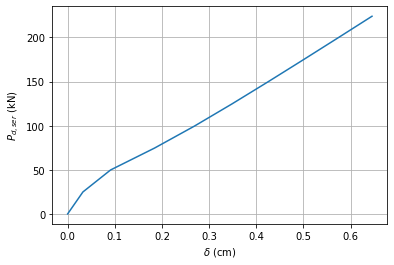

In [4]:
npassos = 10
Pg = np.linspace(0, 200, npassos)
Pq = 0.40  * Pg
flecha = []
Pdser = []
print("PROCESSO DE CÁLCULO DA FLECHA")
for passo in range(npassos):
    Pdser.append(Pg[passo] + 0.30 * Pq[passo]) 
    Mat = (Pdser[passo] * L) / 4
    print
    if Mat > Mr:
        inerciaM = BRANSON_INERTIA(Mr, Mat, Ii, Iii)
        inercia = inerciaM
    else:
        inercia = Ii
    EinerciaM = Ecs * inercia
    flechaImediata = DISPLACEMENT(1, EinerciaM, Pdser[passo], L)
    pho, alphaf, flechaTotal = TOTAL_DISPLACEMENT(flechaImediata, AsComp, bw, d, 0, 70)
    print("Carga Pd,ser     =", Pdser[passo])
    print("Momento Md,ser   =", Mat)
    print("I_EQ             =", inercia)
    print("EI               =", EinerciaM)
    print("flecha Imediata  =", flechaImediata)
    print("pho =", pho, "alphaf =", alphaf)
    print("flecha fluência  =", flechaTotal)
    flecha.append(flechaTotal) 
    print("   ")    
    print("   ")    
plt.plot(flecha, Pdser)
plt.xlabel('$\delta$ (cm)')
plt.ylabel('$P_{d,ser}$ (kN)')
plt.grid(True)
plt.savefig('curva P-Delta.svg')